In [1]:
# Import packages
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import time
import collections
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
import itertools
import keras
from keras import backend as K
from keras.layers import Activation, Dense
from keras.metrics import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix, f1_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, KFold, learning_curve, RandomizedSearchCV, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data
df = pd.read_csv("creditcard.csv")

---
### Data Analysis

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Check for null values
df.isnull().sum().max()

0

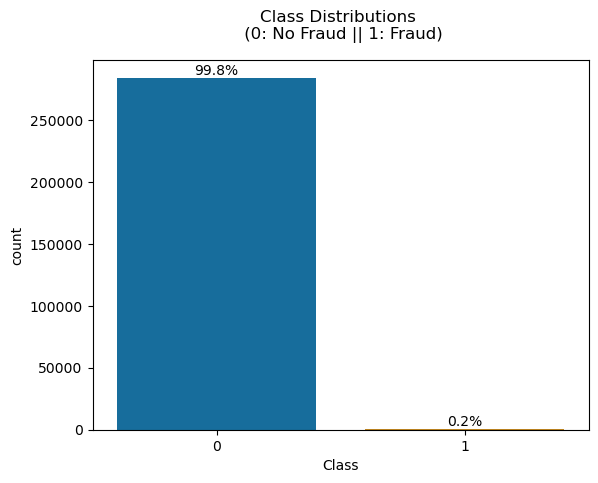

In [7]:
# Visualize distribution of target variable
ax = sns.countplot(x = "Class", data = df, palette = "colorblind")
total = df["Class"].count()
ax.bar_label(ax.containers[0], fmt = lambda x: f"{(x/total) * 100:0.1f}%")
plt.title("Class Distributions \n (0: No Fraud || 1: Fraud)", pad = 15)
plt.show()

---
**Observations:** We can observe here that our dataset is extremely imbalanced, as most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. 

---

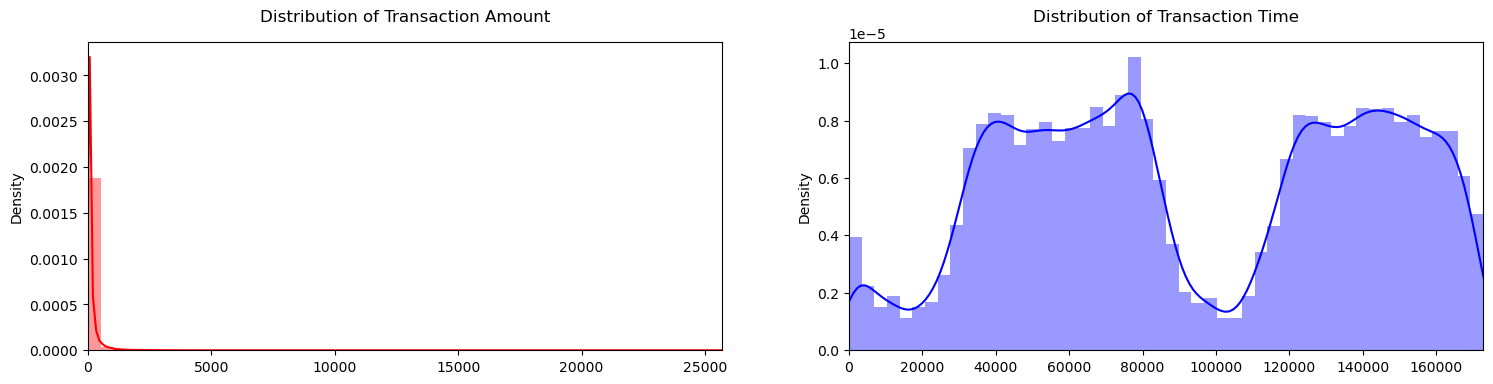

In [8]:
# Visualize distribution of the "Transaction Amount" and "Transaction Time" features
fig, ax = plt.subplots(1, 2, figsize = (18,4))

amount_val = df["Amount"].values
time_val = df["Time"].values

sns.distplot(amount_val, ax = ax[0], color = "r")
ax[0].set_title("Distribution of Transaction Amount", pad = 15)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color="b")
ax[1].set_title("Distribution of Transaction Time", pad = 15)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

---
**Observations:** Most of our data has already been scaled, but we'll still need to scale these two columns. 

We'll also need to create a subsample of our dataframe in order to have an equal amount of fraud and non-fraud cases to help our algorithm better understand patterns that determines whether a transaction is a fraud or not. Therefore in this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. That way we'll prevent our model from overfitting and making wrong correlations.

---

---
### Scaling

In [9]:
# Scale 'Amount' and 'Time' columns
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df["scaled_amount"] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["scaled_time"] = rob_scaler.fit_transform(df["Time"].values.reshape(-1, 1))

df.drop(["Time","Amount"], axis = 1, inplace = True)

scaled_amount = df["scaled_amount"]
scaled_time = df["scaled_time"]

df.drop(["scaled_amount", "scaled_time"], axis = 1, inplace = True)
df.insert(0, "scaled_amount", scaled_amount)
df.insert(1, "scaled_time", scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
print("No frauds:", round(df["Class"].value_counts()[0]/len(df) * 100, 2), "% of the dataset")
print("Frauds:", round(df["Class"].value_counts()[1]/len(df) * 100, 2), "% of the dataset")

No frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


In [11]:
# Split data 
X = df.drop("Class", axis = 1)
y = df["Class"]

In [12]:
sss = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [13]:
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)
print("-" * 100)

print("Label Distributions: \n")
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


---
**Observations:** We can now implement 'Random Under Sampling', which consists of removing data in order to have a more balanced dataset and thus avoid overfitting.

Note: The main issue with 'Random Under-Sampling' is that we run the risk that our classification model will not perform as accurately as we would like to since there is a great deal of information loss (bringing 492 non-fraud transactions from 284,315 non-fraud transactions).

---
### Random Under-Sampling

In [14]:
# Shuffle data before creating subsamples
df = df.sample(frac = 1)

fraud_df = df.loc[df["Class"] == 1] # Frauds
non_fraud_df = df.loc[df["Class"] == 0][:492] # Non-frauds

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac = 1, random_state = 42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
20381,3.845036,-0.630776,-0.913316,-1.086106,1.215815,-2.307444,-1.467004,-0.263753,1.123563,-0.586463,...,-0.240184,-0.221864,-0.072434,0.264294,0.004503,0.144179,-0.351652,-0.064650,-0.179974,0
6903,-0.293440,-0.890588,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,...,0.408704,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1
65288,-0.279466,-0.389784,1.199185,0.269953,0.568721,1.097667,-0.132343,-0.047148,-0.137284,0.030371,...,-0.136405,-0.071679,-0.130225,0.016638,-0.293491,0.401079,-0.427983,0.052862,0.025002,0
102445,-0.293440,-0.193670,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1
198868,-0.293440,0.563869,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,...,0.318853,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1


In [15]:
print("No frauds:", round(new_df["Class"].value_counts()[0]/len(new_df) * 100, 2), "% of the new dataset")
print("Frauds:", round(new_df["Class"].value_counts()[1]/len(new_df) * 100, 2), "% of the new dataset")

No frauds: 50.0 % of the new dataset
Frauds: 50.0 % of the new dataset


---
**Observations:** Our dataframe is now correctly balanced. We can go further with our analysis and data preprocessing.

---

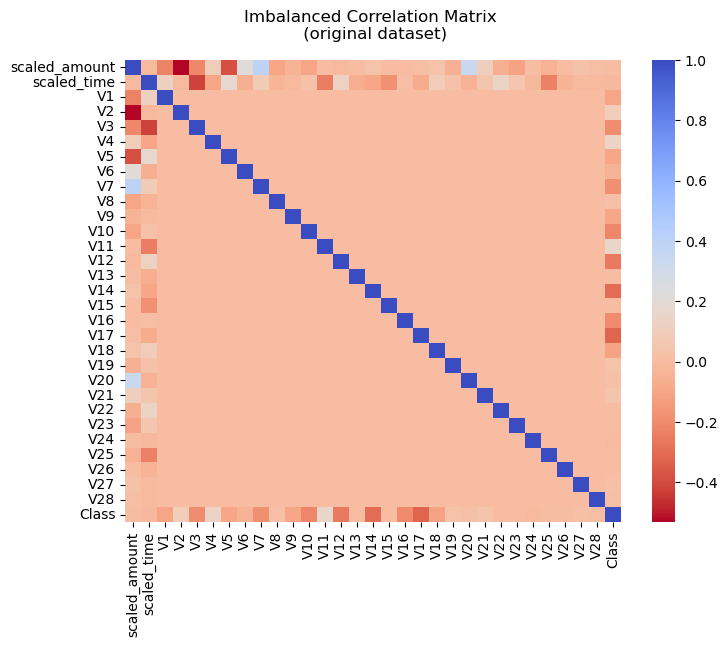

In [16]:
# Visualize correlations
f, ax = plt.subplots(1, 1, figsize = (8, 6))

# Compute correlations with the original dataframe
corr = df.corr()
sns.heatmap(corr, cmap = "coolwarm_r", annot_kws = {"size": 20}, ax = ax)
ax.set_title("Imbalanced Correlation Matrix \n (original dataset)", pad = 15)
plt.show()

---
**Observations:** Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However we can see very clearly here that using the original dataframe causes our correlation matrix to be affected by the high imbalance between our classes. 

Visualizing the potential correlations will be more effective using our newly created subsample.

---

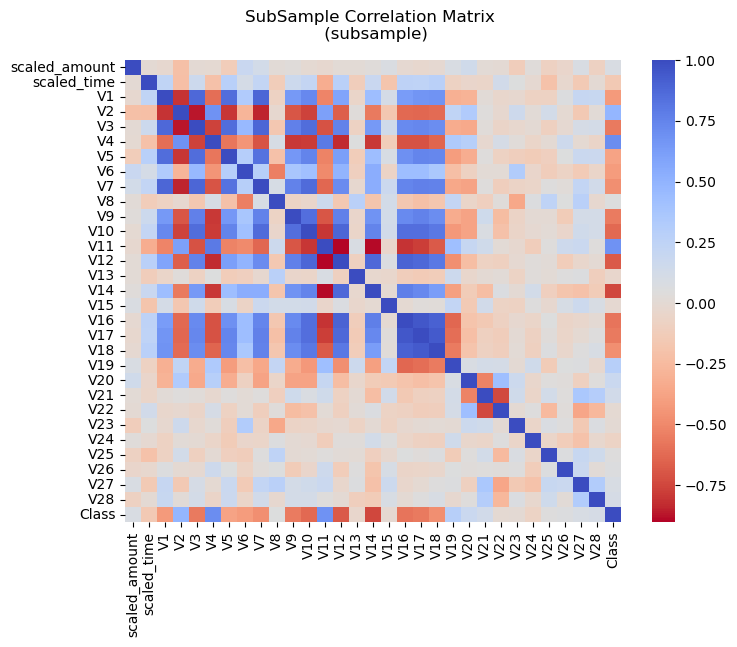

In [17]:
f, ax = plt.subplots(1, 1, figsize = (8, 6))

# Compute correlations with the new dataframe
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap = "coolwarm_r", annot_kws = {"size": 20}, ax = ax)
ax.set_title("SubSample Correlation Matrix \n (subsample)", pad = 15)
plt.show()

---
### Anomaly Detection

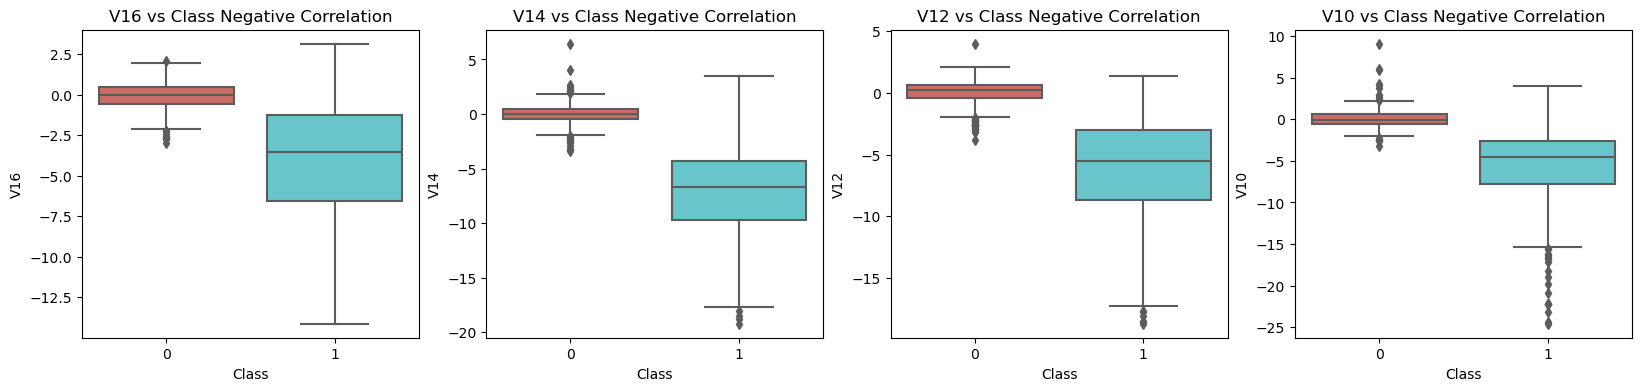

In [18]:
# Plot negative correlations with our class (the lower our feature value the more likely it will be a fraud transaction)
f, axes = plt.subplots(ncols = 4, figsize = (20,4))

sns.boxplot(x = "Class", y = "V16", data = new_df, palette = "hls", ax = axes[0])
axes[0].set_title("V16 vs Class Negative Correlation")

sns.boxplot(x = "Class", y = "V14", data = new_df, palette = "hls", ax = axes[1])
axes[1].set_title("V14 vs Class Negative Correlation")

sns.boxplot(x = "Class", y = "V12", data = new_df, palette = "hls", ax = axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x  ="Class", y = "V10", data = new_df, palette = "hls", ax = axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

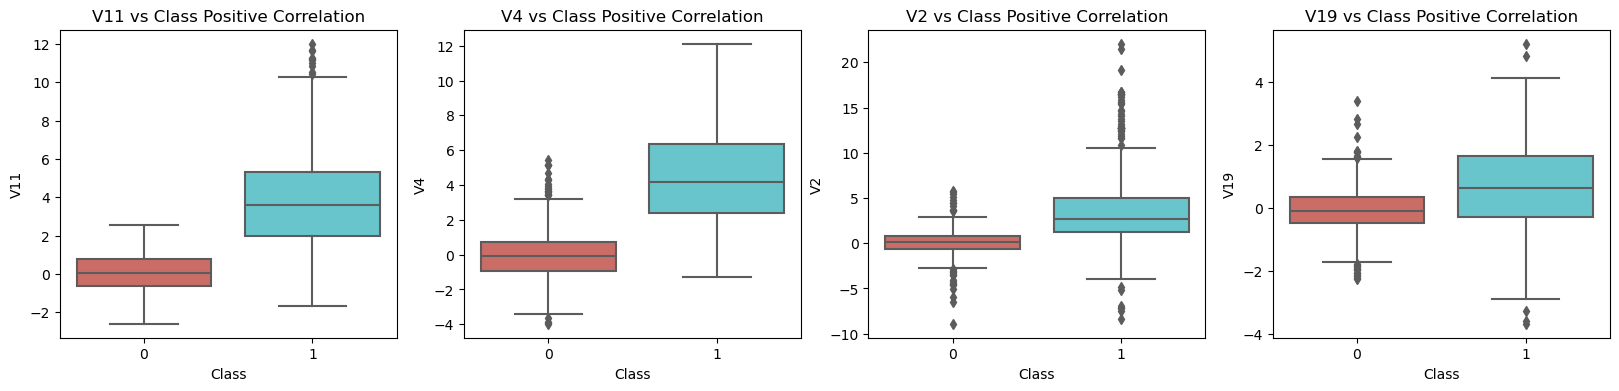

In [19]:
# Plot positive correlations (the higher the feature the probability increases that it will be a fraud transaction)
f, axes = plt.subplots(ncols = 4, figsize = (20, 4))

sns.boxplot(x = "Class", y = "V11", data = new_df, palette = "hls", ax = axes[0])
axes[0].set_title("V11 vs Class Positive Correlation")

sns.boxplot(x = "Class", y = "V4", data = new_df, palette = "hls", ax = axes[1])
axes[1].set_title("V4 vs Class Positive Correlation")

sns.boxplot(x = "Class", y = "V2", data = new_df, palette = "hls", ax = axes[2])
axes[2].set_title("V2 vs Class Positive Correlation")

sns.boxplot(x = "Class", y = "V19", data = new_df, palette = "hls", ax = axes[3])
axes[3].set_title("V19 vs Class Positive Correlation")

plt.show()

---
**Observations:** We should now aim at removing extreme outliers from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our model. Doing so, we have to be careful and avoid an extreme amount of information loss or our model runs the risk of underfitting.

First we can start by visualizing the distribution of the features we are going to use to eliminate some of the outliers.

---

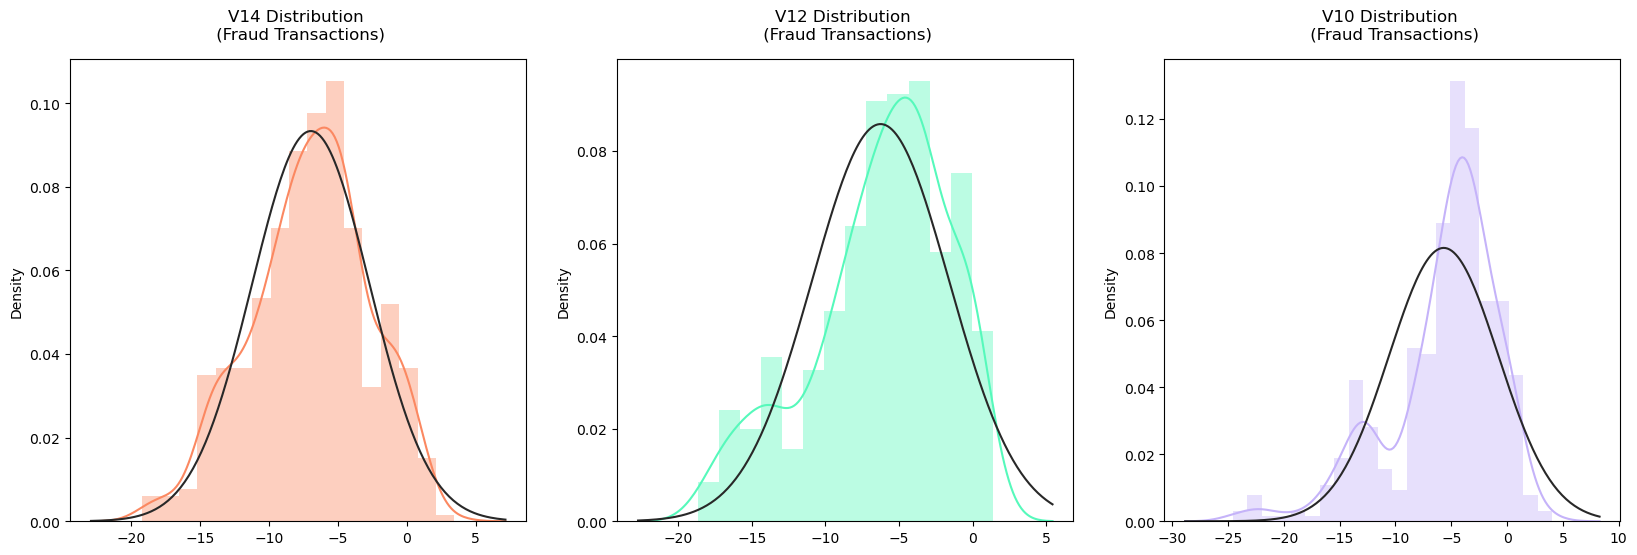

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20, 6))

v14_fraud_dist = new_df["V14"].loc[new_df["Class"] == 1].values
sns.distplot(v14_fraud_dist, ax = ax1, fit = norm, color = "#FB8861")
ax1.set_title("V14 Distribution \n (Fraud Transactions)", pad = 15)

v12_fraud_dist = new_df["V12"].loc[new_df["Class"] == 1].values
sns.distplot(v12_fraud_dist, ax = ax2, fit = norm, color = "#56F9BB")
ax2.set_title("V12 Distribution \n (Fraud Transactions)", pad = 15)

v10_fraud_dist = new_df["V10"].loc[new_df["Class"] == 1].values
sns.distplot(v10_fraud_dist, ax = ax3, fit = norm, color = "#C5B3F9")
ax3.set_title("V10 Distribution \n (Fraud Transactions)", pad = 15)

plt.show()

---
**Observations:**  V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.

We can now go on and determine the upper and lower thresholds by which we will remove the outliers. 

---

In [21]:
# V14 removing outliers
v14_fraud = new_df["V14"].loc[new_df["Class"] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print("V14 Lower: {}".format(v14_lower))
print("V14 Upper: {}".format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
new_df = new_df.drop(new_df[(new_df["V14"] > v14_upper) | (new_df["V14"] < v14_lower)].index)

print("V14 outliers:{}".format(outliers))
print("Feature V14 outliers for fraud cases: {}".format(len(outliers)))
print("Number of instances after outliers removal: {}".format(len(new_df)))

V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
V14 outliers:[-18.0499976898594, -19.2143254902614, -18.8220867423816, -18.4937733551053]
Feature V14 outliers for fraud cases: 4
Number of instances after outliers removal: 978


In [22]:
# V12 removing outliers 
v12_fraud = new_df["V12"].loc[new_df["Class"] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print("V12 Lower: {}".format(v12_lower))
print("V12 Upper: {}".format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
new_df = new_df.drop(new_df[(new_df["V12"] > v12_upper) | (new_df["V12"] < v12_lower)].index)

print("V12 outliers: {}".format(outliers))
print("Feature V12 outliers for fraud cases: {}".format(len(outliers)))
print("Number of instances after outliers removal: {}".format(len(new_df)))

V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.5536970096458, -18.4311310279993, -18.6837146333443]
Feature V12 outliers for fraud cases: 4
Number of instances after outliers removal: 974


In [23]:
# V10 removing outliers 
v10_fraud = new_df["V10"].loc[new_df["Class"] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print("V10 Lower: {}".format(v10_lower))
print("V10 Upper: {}".format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
new_df = new_df.drop(new_df[(new_df["V10"] > v10_upper) | (new_df["V10"] < v10_lower)].index)

print("V10 outliers: {}".format(outliers))
print("Feature V10 outliers for fraud cases: {}".format(len(outliers)))
print("Number of instances after outliers removal: {}".format(len(new_df)))

V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-17.1415136412892, -18.9132433348732, -15.1237521803455, -16.7460441053944, -22.1870885620007, -23.2282548357516, -22.1870885620007, -22.1870885620007, -16.6011969664137, -15.2399619587112, -24.4031849699728, -19.836148851696, -14.9246547735487, -15.5637913387301, -15.1241628144947, -16.2556117491401, -15.5637913387301, -16.6496281595399, -15.2399619587112, -14.9246547735487, -15.2318333653018, -15.3460988468775, -24.5882624372475, -18.2711681738888, -16.3035376590131, -22.1870885620007, -20.9491915543611]
Feature V10 outliers for fraud cases: 27
Number of instances after outliers removal: 944


---
**Observations:** We can now visualize through boxplots that the number of "extreme outliers" have been reduced to a considerable amount.

---

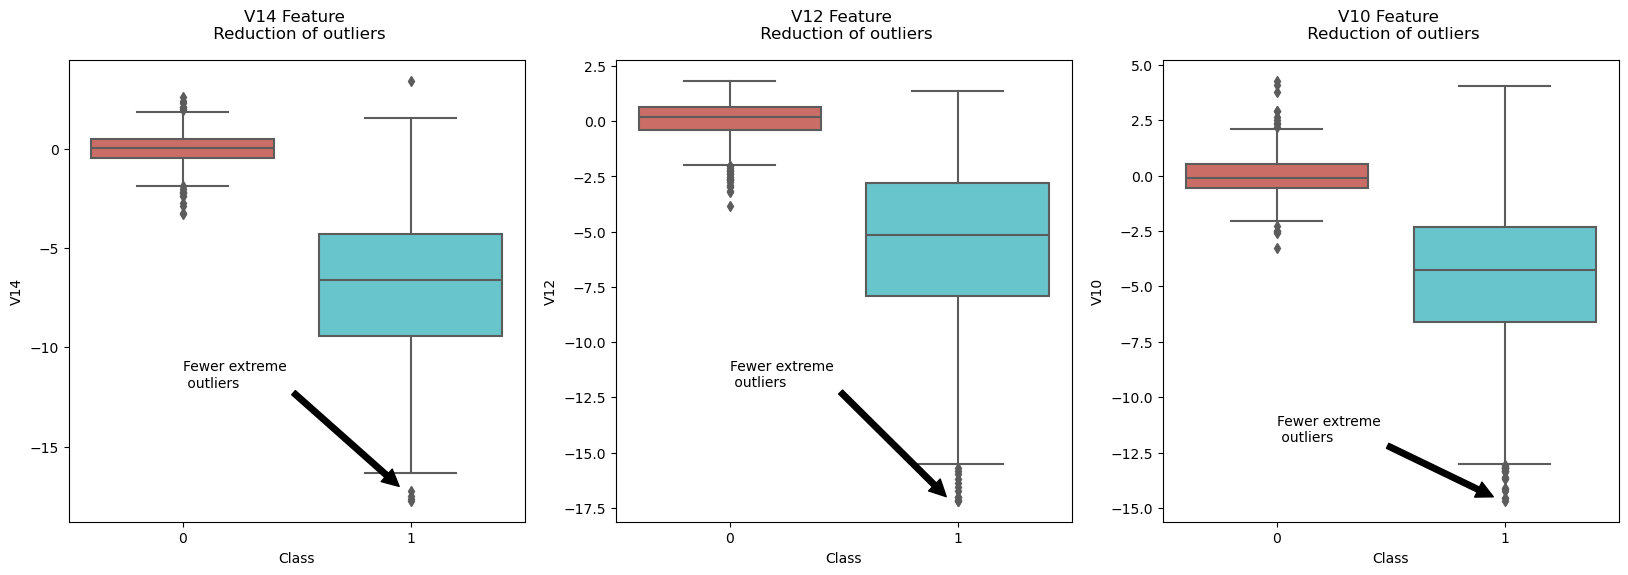

In [24]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))

# Feature V14
sns.boxplot(x = "Class", y = "V14", data = new_df, ax = ax1, palette = "hls")
ax1.set_title("V14 Feature \n Reduction of outliers", pad = 15)
ax1.annotate("Fewer extreme \n outliers", xy = (0.95, -17), xytext = (0, -12), arrowprops = dict(facecolor = "black"))

# Feature V12
sns.boxplot(x = "Class", y = "V12", data = new_df, ax = ax2, palette = "hls")
ax2.set_title("V12 Feature \n Reduction of outliers", pad = 15)
ax2.annotate("Fewer extreme \n outliers", xy = (0.95, -17), xytext = (0, -12), arrowprops = dict(facecolor = "black"))

# Feature V10
sns.boxplot(x = "Class", y = "V10", data = new_df, ax = ax3, palette = "hls")
ax3.set_title("V10 Feature \n Reduction of outliers", pad = 15)
ax3.annotate("Fewer extreme \n outliers", xy = (0.95, -14.5), xytext = (0, -12), arrowprops = dict(facecolor = "black"))

plt.show()

---
### Dimensionality Reduction and Clustering

In [25]:
# Split data from subsample
X = new_df.drop("Class", axis = 1)
y = new_df["Class"]

# t-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components = 2, random_state = 42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components = 2, algorithm = "randomized", random_state = 42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.8 s
PCA took 0.0026 s
Truncated SVD took 0.0017 s


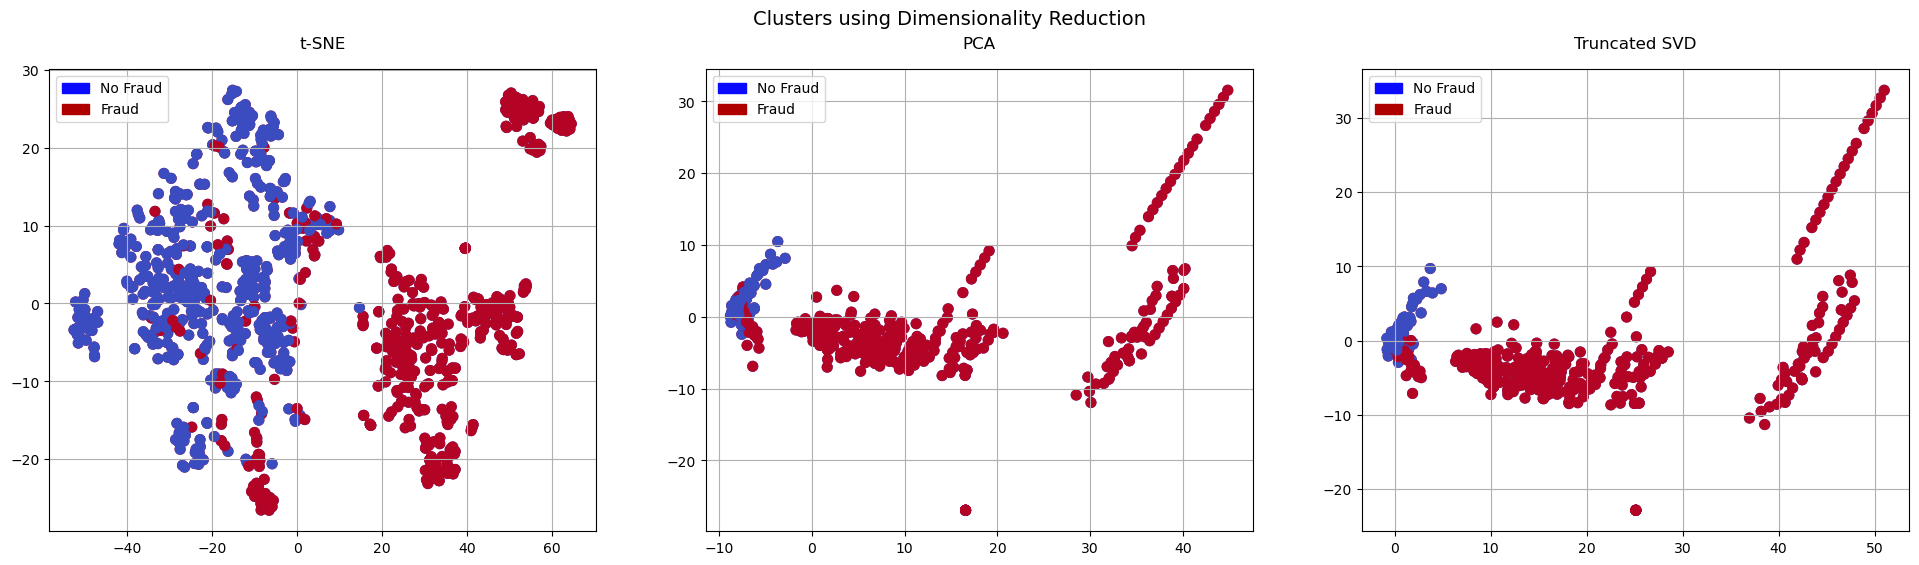

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize = 14)

blue_patch = mpatches.Patch(color = '#0A0AFF', label = "No Fraud")
red_patch = mpatches.Patch(color = '#AF0000', label = "Fraud")

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c = (y == 0), cmap = "coolwarm", label = "No Fraud", linewidths = 2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c = (y == 1), cmap = "coolwarm", label = "Fraud", linewidths = 2)
ax1.set_title("t-SNE", pad = 15)
ax1.grid(True)
ax1.legend(handles = [blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c = (y == 0), cmap = "coolwarm", label = "No Fraud", linewidths = 2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c = (y == 1), cmap = "coolwarm", label = "Fraud", linewidths = 2)
ax2.set_title("PCA", pad = 15)
ax2.grid(True)
ax2.legend(handles = [blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c = (y == 0), cmap = "coolwarm", label = "No Fraud", linewidths = 2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c = (y == 1), cmap = "coolwarm", label = "Fraud", linewidths = 2)
ax3.set_title('Truncated SVD', pad = 15)
ax3.grid(True)
ax3.legend(handles = [blue_patch, red_patch])

plt.show()

---
**Observations:** The t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset. Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario. This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.

---
### Building The Model

We will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions. But before we have to split our data into training and testing sets and separate the features from the labels.

In [27]:
# Split data from subsample into train and test sets
X = new_df.drop("Class", axis = 1)
y = new_df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Turn the values into an array for feeding the classification algorithms
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [29]:
# Implement classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [30]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print("Classifier:", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "%.")

Classifier: LogisticRegression has a training score of 93.0 %.
Classifier: KNeighborsClassifier has a training score of 93.0 %.
Classifier: SVC has a training score of 94.0 %.
Classifier: DecisionTreeClassifier has a training score of 91.0 %.


In [31]:
# Use GridSearchCV to find the best parameters

# Logistic Regression 
log_reg_params = {"penalty": ["l1", "l2"], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# KNears 
knears_params = {"n_neighbors": list(range(2,5,1)), "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {"C": [0.5, 0.7, 0.9, 1], "kernel": ["rbf", "poly", "sigmoid", "linear"]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 4, 1)), "min_samples_leaf": list(range(5, 7, 1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [32]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv = 5)
print("Logistic Regression Cross Validation Score:", round(log_reg_score.mean() * 100, 2).astype(str) + "%")

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv = 5)
print("Knears Neighbors Cross Validation Score:", round(knears_score.mean() * 100, 2).astype(str) + "%")

svc_score = cross_val_score(svc, X_train, y_train, cv = 5)
print("Support Vector Classifier Cross Validation Score:", round(svc_score.mean() * 100, 2).astype(str) + "%")

tree_score = cross_val_score(tree_clf, X_train, y_train, cv = 5)
print("DecisionTree Classifier Cross Validation Score:", round(tree_score.mean() * 100, 2).astype(str) + "%")

Logistic Regression Cross Validation Score: 94.04%
Knears Neighbors Cross Validation Score: 93.38%
Support Vector Classifier Cross Validation Score: 93.91%
DecisionTree Classifier Cross Validation Score: 93.11%


In [33]:
# Undersample during cross validating
undersample_X = df.drop("Class", axis = 1)
undersample_y = df["Class"]

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

Train: [ 56962  56963  56964 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 56960 56961]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56962  56963  56964 ... 113921 115211 115884]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113922 113923 113924 ... 170882 170883 171722]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170884 170885 170886 ... 227856 227857 227858]
Train: [     0      1      2 ... 227856 227857 227858] Test: [222831 222992 223488 ... 284804 284805 284806]


In [34]:
# Cross Validate
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy = "majority"), log_reg) 
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

In [35]:
# Visualize LogisticRegression learning curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim = None, cv = None, n_jobs = 1, 
                        train_sizes = np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (20,14), sharey = True)
    if ylim is not None:
        plt.ylim(*ylim)
        
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color = "#ff9124", label = "Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color = "#2492ff", label = "Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", pad = 15)
    ax1.set_xlabel("Training size (m)")
    ax1.set_ylabel("Score")
    ax1.grid(True)
    ax1.legend(loc = "best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(estimator2, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color = "#ff9124", label = "Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color = "#2492ff", label = "Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", pad = 15)
    ax2.set_xlabel("Training size (m)")
    ax2.set_ylabel("Score")
    ax2.grid(True)
    ax2.legend(loc = "best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator3, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color = "#ff9124", label = "Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color = "#2492ff", label = "Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", pad = 15)
    ax3.set_xlabel("Training size (m)")
    ax3.set_ylabel("Score")
    ax3.grid(True)
    ax3.legend(loc = "best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator4, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color = "#ff9124", label = "Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color = "#2492ff", label = "Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", pad = 15)
    ax4.set_xlabel("Training size (m)")
    ax4.set_ylabel("Score")
    ax4.grid(True)
    ax4.legend(loc = "best")
    return plt

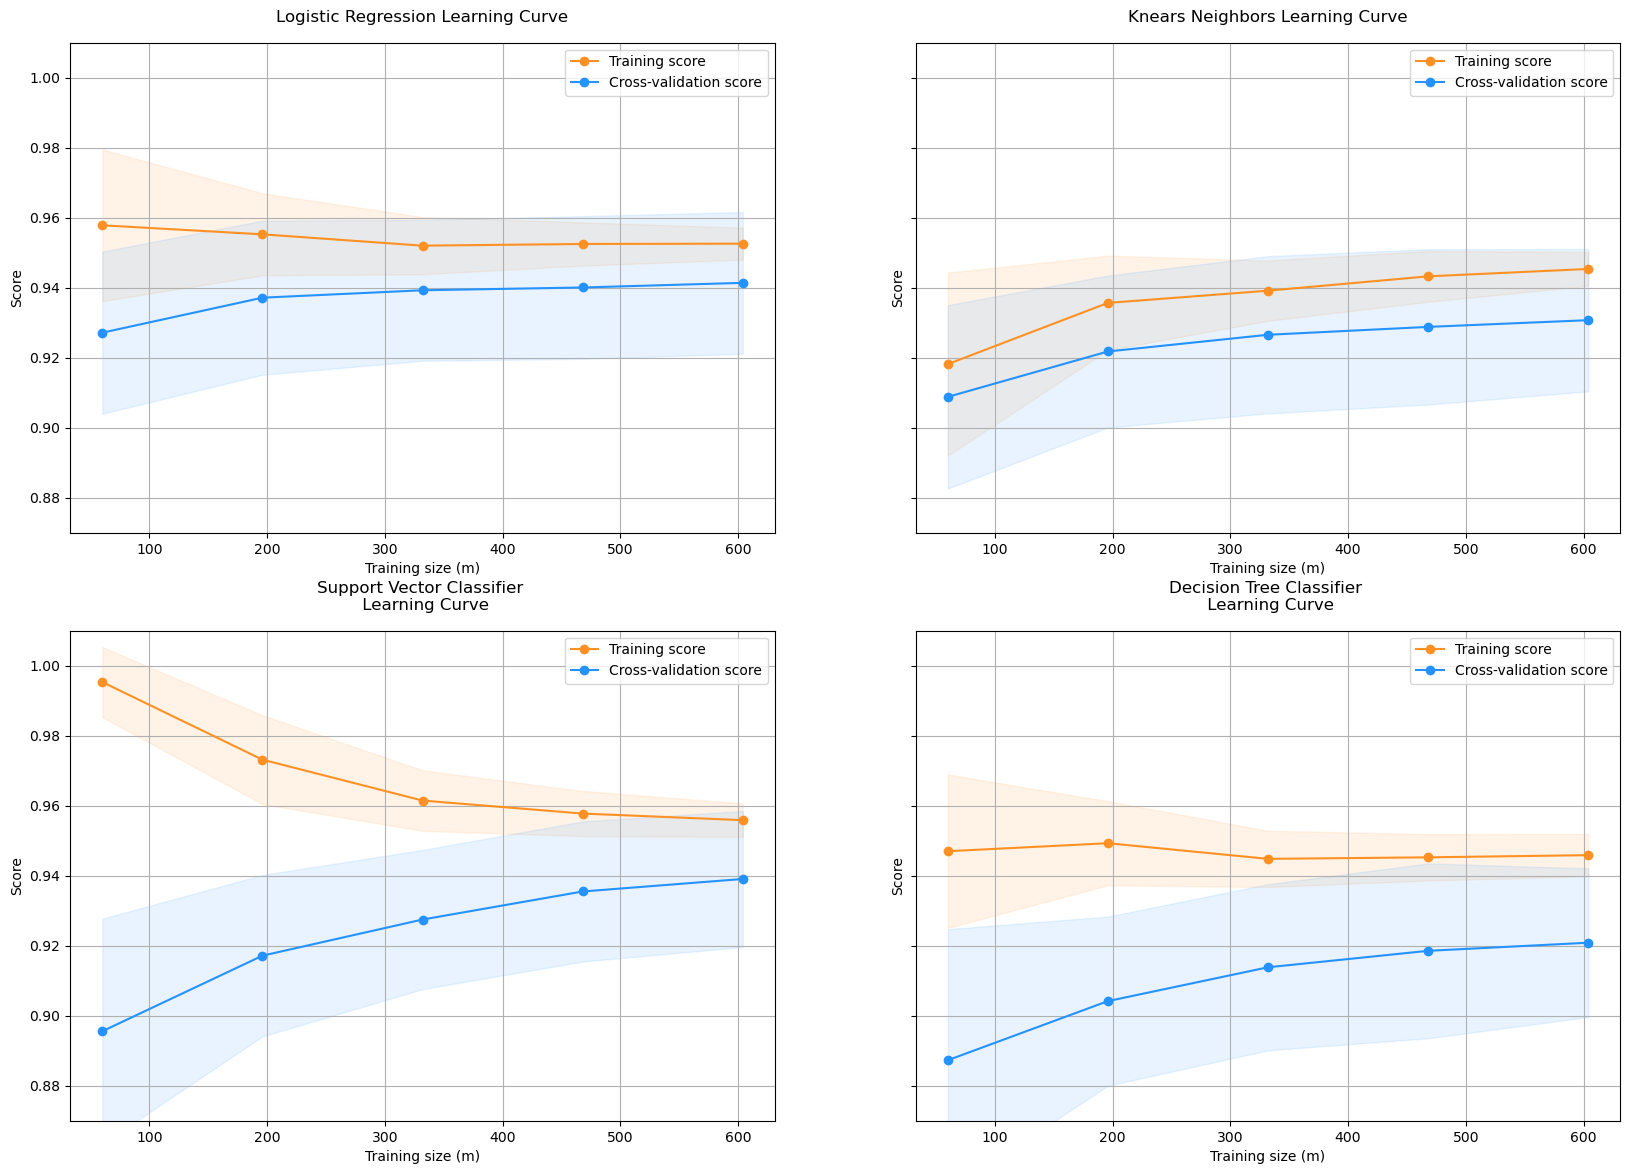

In [36]:
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv = cv, n_jobs = 4);

In [37]:
# Create a dataframe with all the scores and the classifiers names

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv = 5, method = "decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv = 5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv = 5, method = "decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv = 5)

In [38]:
print("Logistic Regression:", round(roc_auc_score(y_train, log_reg_pred), 3))
print("KNears Neighbors:", round(roc_auc_score(y_train, knears_pred), 3))
print("Support Vector Classifier:", round(roc_auc_score(y_train, svc_pred), 3))
print("Decision Tree Classifier:", round(roc_auc_score(y_train, tree_pred), 3))

Logistic Regression: 0.976
KNears Neighbors: 0.933
Support Vector Classifier: 0.97
Decision Tree Classifier: 0.931


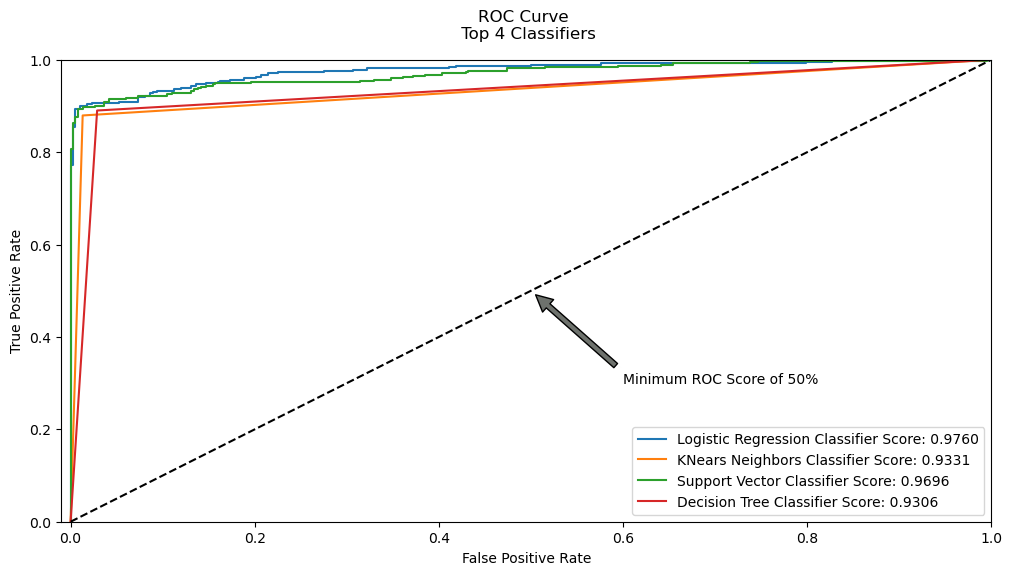

In [39]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize = (12, 6))
    plt.title("ROC Curve \n Top 4 Classifiers", pad = 15)
    plt.plot(log_fpr, log_tpr, label = "Logistic Regression Classifier Score: {:.4f}".format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label = "KNears Neighbors Classifier Score: {:.4f}".format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label = "Support Vector Classifier Score: {:.4f}".format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label = "Decision Tree Classifier Score: {:.4f}".format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.annotate("Minimum ROC Score of 50%", xy = (0.5, 0.5), xytext = (0.6, 0.3), arrowprops = dict(facecolor = "#6E726D", shrink = 0.05))
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

---
### A Deeper Look into LogisticRegression

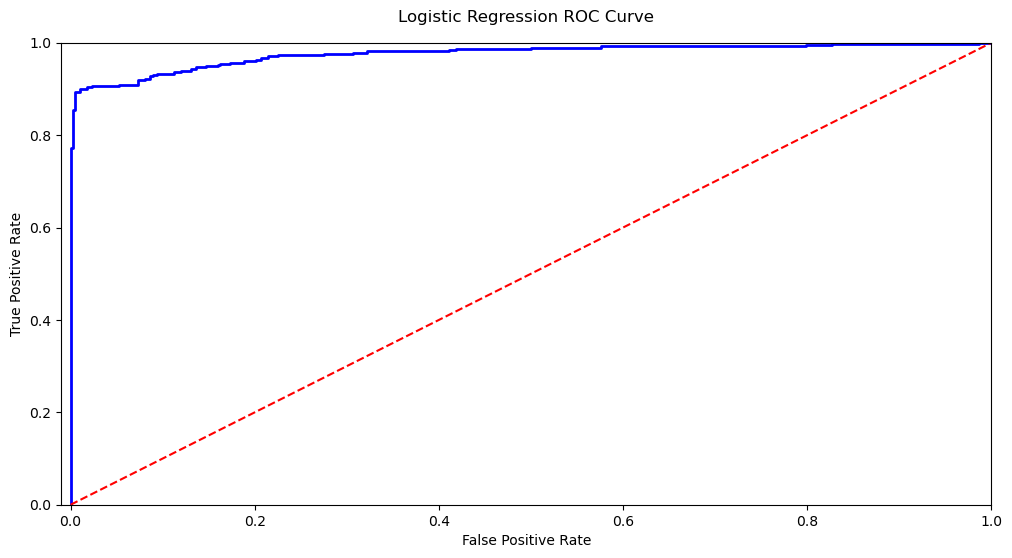

In [40]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize = (12, 6))
    plt.title("Logistic Regression ROC Curve", pad = 15)
    plt.plot(log_fpr, log_tpr, "b-", linewidth = 2)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.axis([-0.01, 1, 0, 1])
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [41]:
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [42]:
y_pred = log_reg.predict(X_train)

# Overfitting Case
print("Overfitting:")
print("\t Recall Score: {:.2f}".format(recall_score(y_train, y_pred)))
print("\t Precision Score: {:.2f}".format(precision_score(y_train, y_pred)))
print("\t F1 Score: {:.2f}".format(f1_score(y_train, y_pred)))
print("\t Accuracy Score: {:.2f}".format(accuracy_score(y_train, y_pred)))

Overfitting:
	 Recall Score: 0.91
	 Precision Score: 0.78
	 F1 Score: 0.84
	 Accuracy Score: 0.82


In [43]:
# How it should look like
print("How it should be:")
print("\t Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("\t Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("\t Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("\t F1 Score: {:.2f}".format(np.mean(undersample_f1)))

How it should be:
	 Accuracy Score: 0.66
	 Precision Score: 0.00
	 Recall Score: 0.31
	 F1 Score: 0.00


In [44]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [45]:
undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print("Average precision-recall score: {0:0.2f}".format(undersample_average_precision))

Average precision-recall score: 0.07


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.07')

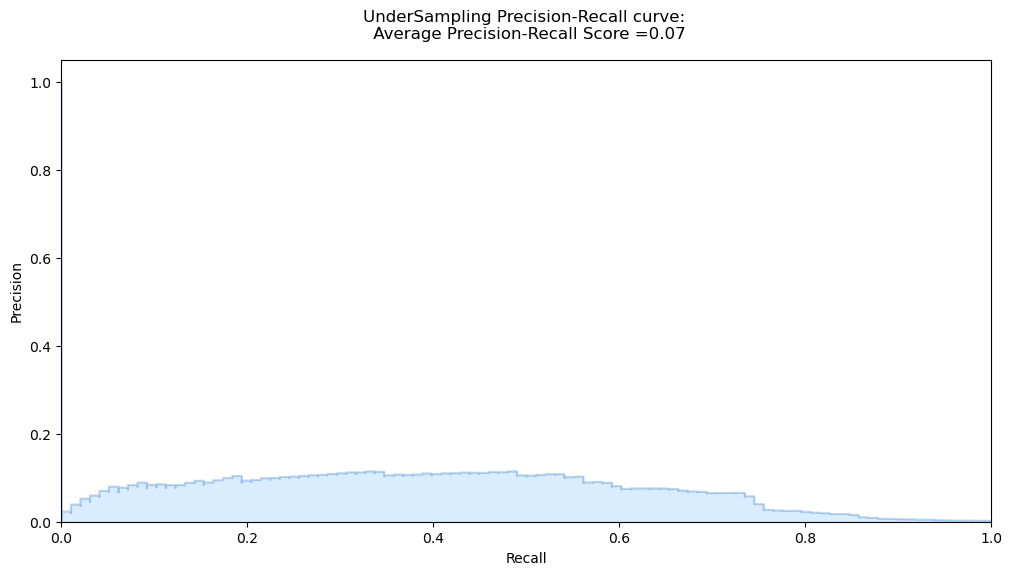

In [46]:
fig = plt.figure(figsize = (12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color = "#004a93", alpha = 0.2, where = "post")
plt.fill_between(recall, precision, step = "post", alpha = 0.2, color = "#48a6ff")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}".format(undersample_average_precision), 
          pad = 15)

---
### SMOTE Technique (Over-Sampling)

Unlike Random Under Sampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

SMOTE occurs during cross validation and not prior to the cross validation process. It's very important because if we undersample or oversample our data before cross validating, we will influence the validation set before implementing cross-validation and cause a *data leakage* problem.

With SMOTE, synthetic data are created only for the training set without affecting the validation set.


In [47]:
print("Length of X (train): {} | Length of y (train): {}".format(len(original_Xtrain), len(original_ytrain)))
print("Length of X (test): {} | Length of y (test): {}".format(len(original_Xtest), len(original_ytest)))

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


In [48]:
# List to append the score and find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

In [49]:
# Classifier with optimal parameters
log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter = 4)

# Implement SMOTE technique 
log_reg_params = {"penalty": ["l1", "l2"], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy = "minority"), rand_log_reg) 
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print("Accuracy: {}".format(np.mean(accuracy_lst)))
print("Precision: {}".format(np.mean(precision_lst)))
print("Recall: {}".format(np.mean(recall_lst)))
print("F1: {}".format(np.mean(f1_lst)))

Accuracy: 0.948136570636095
Precision: 0.05983343420759464
Recall: 0.9137293086660175
F1: 0.11066850099159668


In [50]:
labels = ["No Fraud", "Fraud"]
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names = labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.86      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [51]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print("Average precision-recall score: {0:0.2f}".format(average_precision))

Average precision-recall score: 0.70


Text(0.5, 1.0, 'Average Precision-Recall Score = 0.70')

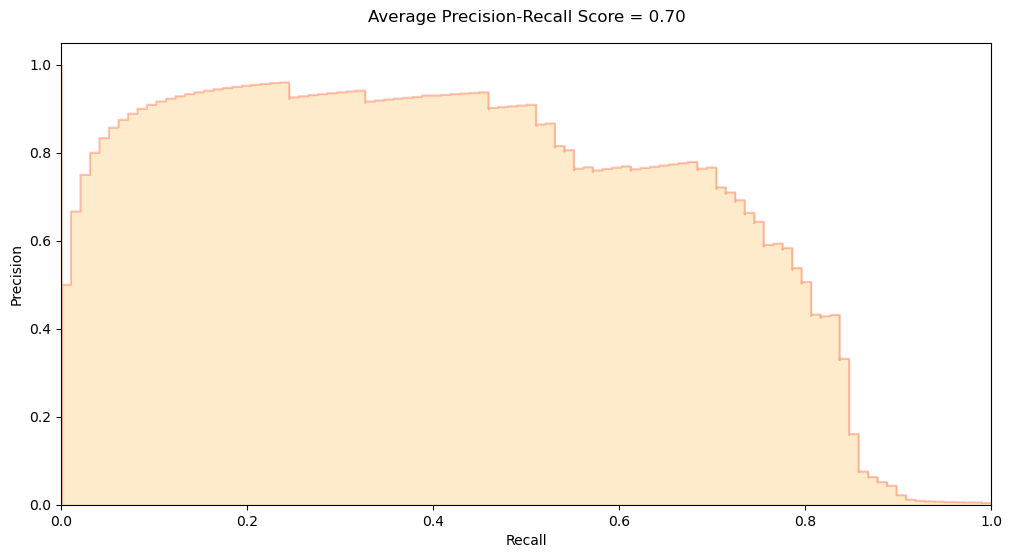

In [52]:
fig = plt.figure(figsize = (12,6))
precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color = "r", alpha = 0.2, where = "post")
plt.fill_between(recall, precision, step = "post", alpha = 0.2, color = "#F59B00")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Average Precision-Recall Score = {0:0.2f}".format(average_precision), pad = 15)

In [53]:
original_ytrain

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
# SMOTE technique after splitting and cross validating
sm = SMOTE(sampling_strategy = "minority", random_state = 42)
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [55]:
# Implement GridSearchCV and the other models
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took: {} sec".format(t1 - t0))

Fitting oversample data took: 3.1633379459381104 sec


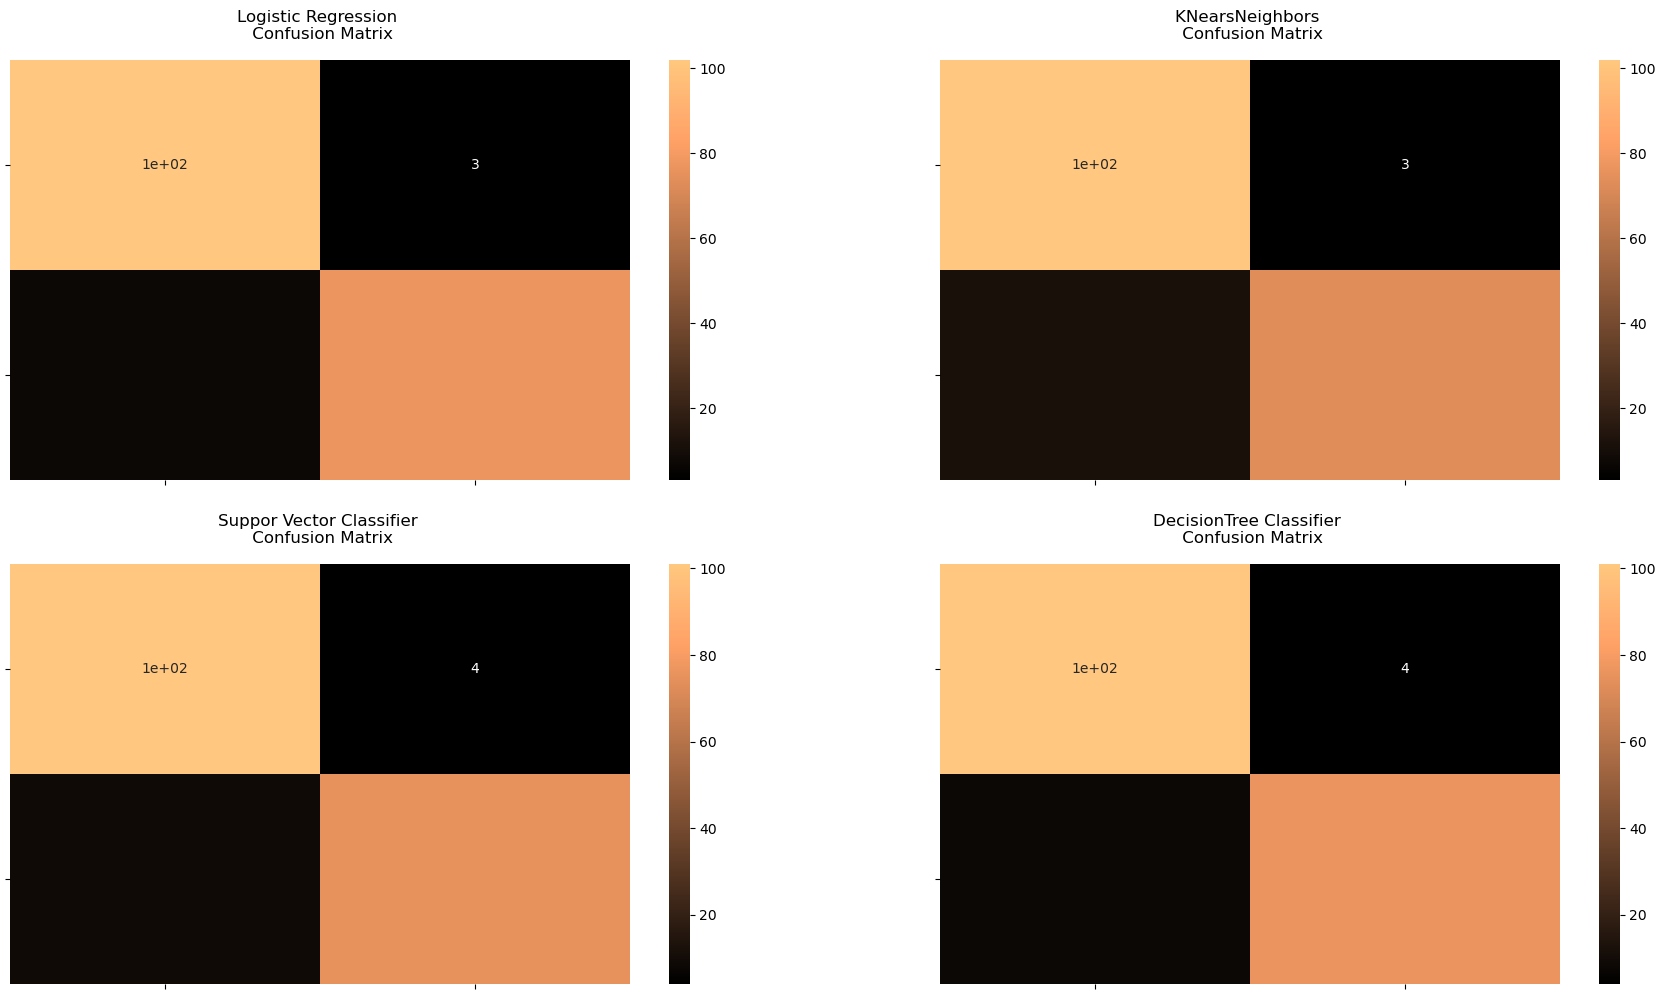

In [56]:
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with Under Sampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize = (22, 12))

sns.heatmap(log_reg_cf, ax = ax[0][0], annot = True, cmap = plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", pad = 15)
ax[0, 0].set_xticklabels(['', ''], rotation = 90)
ax[0, 0].set_yticklabels(['', ''], rotation = 360)

sns.heatmap(kneighbors_cf, ax = ax[0][1], annot = True, cmap = plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", pad = 15)
ax[0][1].set_xticklabels(['', ''], rotation = 90)
ax[0][1].set_yticklabels(['', ''], rotation = 360)

sns.heatmap(svc_cf, ax = ax[1][0], annot = True, cmap = plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", pad = 15)
ax[1][0].set_xticklabels(['', ''], rotation = 90)
ax[1][0].set_yticklabels(['', ''], rotation = 360)

sns.heatmap(tree_cf, ax = ax[1][1], annot = True, cmap = plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", pad = 15)
ax[1][1].set_xticklabels(['', ''], rotation = 90)
ax[1][1].set_yticklabels(['', ''], rotation = 360)

plt.show()

In [57]:
print("Logistic Regression: \n")
print(classification_report(y_test, y_pred_log_reg))

print("\n KNears Neighbors: \n")
print(classification_report(y_test, y_pred_knear))

print("\n Support Vector Machine: \n")
print(classification_report(y_test, y_pred_svc))

print("\n Decision Tree: \n")
print(classification_report(y_test, y_pred_tree))

Logistic Regression: 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       105
           1       0.96      0.92      0.94        84

    accuracy                           0.95       189
   macro avg       0.95      0.94      0.95       189
weighted avg       0.95      0.95      0.95       189


 KNears Neighbors: 

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       105
           1       0.96      0.87      0.91        84

    accuracy                           0.93       189
   macro avg       0.93      0.92      0.92       189
weighted avg       0.93      0.93      0.93       189


 Support Vector Machine: 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.95      0.89      0.92        84

    accuracy                           0.93       189
   macro avg       0.93      0.93      0.93       189
w

In [58]:
# Logistic Regression with under sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE technique
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {"Technique": ["Random Under Sampling", "Over Sampling (SMOTE)"], "Score": [undersample_score, oversample_score]}
final_df = pd.DataFrame(data = d)

score = final_df["Score"]
final_df.drop("Score", axis = 1, inplace = True)
final_df.insert(1, "Score", score)

final_df

,Technique,Score
0,Random Under Sampling,0.947090
1,Over Sampling (SMOTE),0.986166


---
### Neural Networks Testing

Lastly, we will implement a simple Neural Network with one hidden layer in order to see which of the two logistic regressions models we implemented has a better accuracy for detecting fraud and non-fraud transactions.

In [59]:
n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape = (n_inputs, ), activation = "relu"),
    Dense(32, activation ="relu"),
    Dense(2, activation = "softmax")
])

In [60]:
undersample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
undersample_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
undersample_model.fit(X_train, y_train, validation_split = 0.2, batch_size = 25, epochs = 20, shuffle = True, verbose = 2)
undersample_predictions = undersample_model.predict(original_Xtest, batch_size = 200, verbose = 0)
undersample_fraud_predictions = np.argmax(undersample_predictions, axis = 1)

Epoch 1/20
25/25 - 1s - 21ms/step - accuracy: 0.6142 - loss: 0.7799 - val_accuracy: 0.7550 - val_loss: 0.6597
Epoch 2/20
25/25 - 0s - 1ms/step - accuracy: 0.8195 - loss: 0.4044 - val_accuracy: 0.9073 - val_loss: 0.5445
Epoch 3/20
25/25 - 0s - 1ms/step - accuracy: 0.8891 - loss: 0.3075 - val_accuracy: 0.9205 - val_loss: 0.4587
Epoch 4/20
25/25 - 0s - 1ms/step - accuracy: 0.9139 - loss: 0.2566 - val_accuracy: 0.9470 - val_loss: 0.4141
Epoch 5/20
25/25 - 0s - 1ms/step - accuracy: 0.9305 - loss: 0.2056 - val_accuracy: 0.9470 - val_loss: 0.4108
Epoch 6/20
25/25 - 0s - 1ms/step - accuracy: 0.9387 - loss: 0.1787 - val_accuracy: 0.9536 - val_loss: 0.3631
Epoch 7/20
25/25 - 0s - 1ms/step - accuracy: 0.9387 - loss: 0.1642 - val_accuracy: 0.9603 - val_loss: 0.3510
Epoch 8/20
25/25 - 0s - 1ms/step - accuracy: 0.9503 - loss: 0.1468 - val_accuracy: 0.9470 - val_loss: 0.3644
Epoch 9/20
25/25 - 0s - 1ms/step - accuracy: 0.9536 - loss: 0.1347 - val_accuracy: 0.9470 - val_loss: 0.3324
Epoch 10/20
25/25 

In [62]:
# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = "Confusion matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title, pad = 15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix without normalization
[[53492  3371]
 [    7    91]]
Confusion matrix without normalization
[[56863     0]
 [    0    98]]


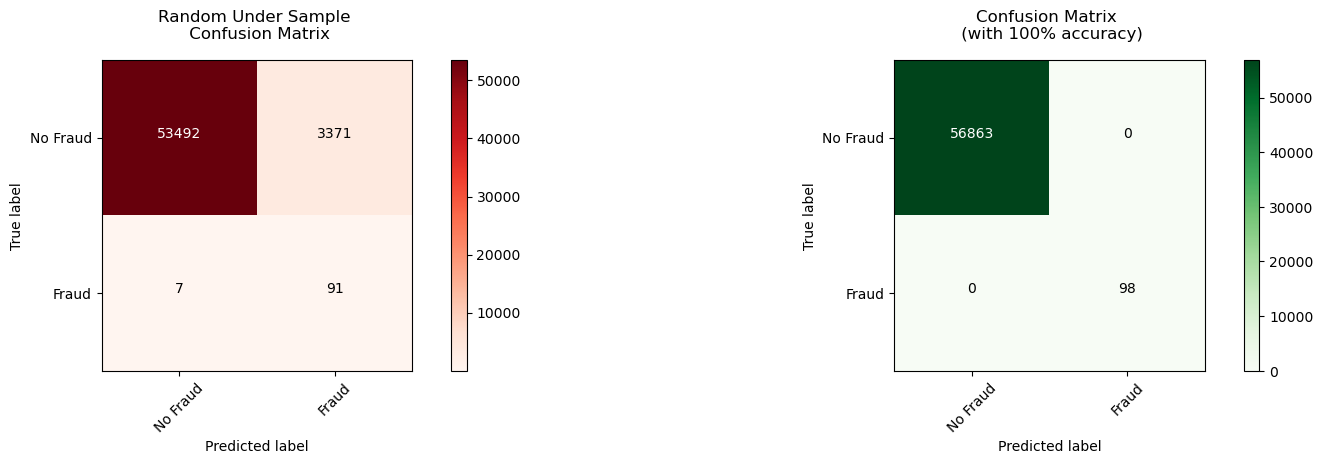

In [63]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ["No Fraud", "Fraud"]

fig = plt.figure(figsize = (16, 8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title = "Random Under Sample \n Confusion Matrix", cmap = plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title = "Confusion Matrix \n (with 100% accuracy)", cmap = plt.cm.Greens)

---
**Observations:** We can see here that in our undersample data, our model is unable to detect a large number of non-fraud transactions correctly and instead, misclassifies those non-fraud transactions as fraud cases. 

---

In [64]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape = (n_inputs, ), activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(2, activation = "softmax")
])

In [65]:
oversample_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
oversample_model.fit(Xsm_train, ysm_train, validation_split = 0.2, batch_size = 300, epochs = 20, shuffle = True, verbose = 2)
oversample_predictions = oversample_model.predict(original_Xtest, batch_size = 200, verbose = 0)
oversample_fraud_predictions = np.argmax(oversample_predictions, axis = 1)

Epoch 1/20
1214/1214 - 1s - 836us/step - accuracy: 0.9719 - loss: 0.0755 - val_accuracy: 0.9877 - val_loss: 0.0369
Epoch 2/20
1214/1214 - 1s - 454us/step - accuracy: 0.9963 - loss: 0.0149 - val_accuracy: 0.9997 - val_loss: 0.0079
Epoch 3/20
1214/1214 - 1s - 451us/step - accuracy: 0.9984 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 4/20
1214/1214 - 1s - 450us/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 5/20
1214/1214 - 1s - 455us/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/20
1214/1214 - 1s - 453us/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/20
1214/1214 - 1s - 452us/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 6.6638e-04
Epoch 8/20
1214/1214 - 1s - 456us/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 4.9456e-04
Epoch 9/20
1214/1214 - 1s - 452us/step - accuracy: 0.9996 - loss: 0.0021

Confusion matrix without normalization
[[56852    11]
 [   27    71]]
Confusion matrix without normalization
[[56863     0]
 [    0    98]]


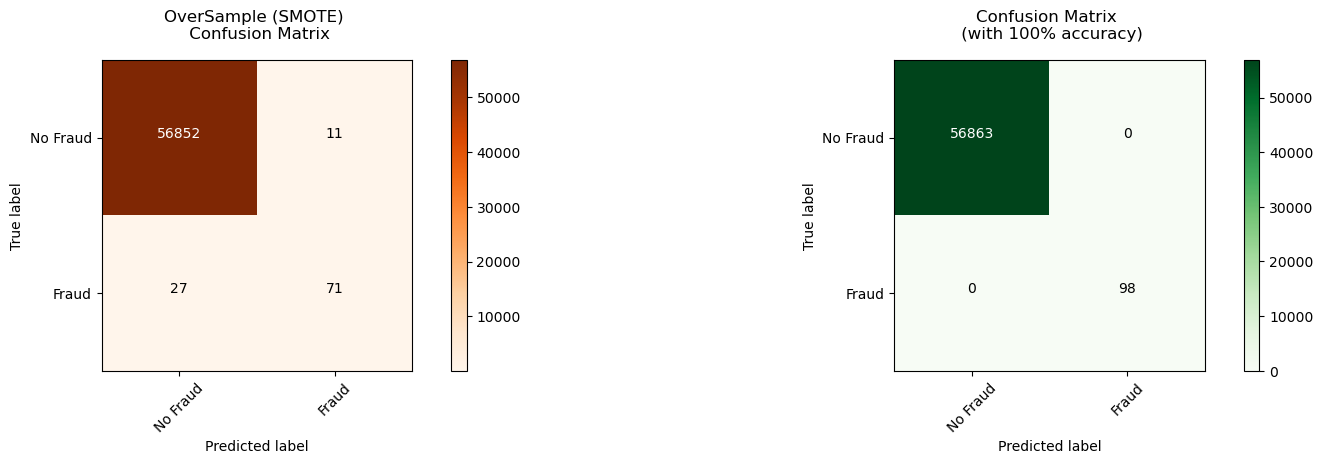

In [66]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ["No Fraud", "Fraud"]

fig = plt.figure(figsize = (16, 8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title = "OverSample (SMOTE) \n Confusion Matrix", cmap = plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title = "Confusion Matrix \n (with 100% accuracy)", cmap = plt.cm.Greens)

---
**Observations:** Implementing SMOTE on our dataset helped us with the imbalance of our labels. However, about one third of all frauds are not detected correctly. We do have to keep in mind that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one. This would be the next step of this analysis to see if the accuracy in the test set improves.

---